# <center>PDL Lab17. Text Classification using Simple RNN</center>

### 205229103

### Arzoo Sah



### import libraries

In [34]:
import csv
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding,SimpleRNN
from nltk.corpus import stopwords
nltk.download('stopwords')
",".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv("comments.csv", encoding= 'unicode_escape')
data.head()

,label,public review on WFH
0,0,home comes with its own distractions.
1,0,lack of face-to-face communication with friend...
2,0,Working from home can dissolve the demarcation...
3,0,Risk of feeling burnt out
4,0,real challenge for employers to monitor perfor...


In [9]:
y = data['label']
X=[]
for review in data['public review on WFH']:
    filtered_sentence = [w.lower() for w in review.split() if not w in STOPWORDS]
    X.append(filtered_sentence)
X = pd.Series(X)  

### Dataset Preparation

In [11]:
X_train,X_val,y_train,y_val = train_test_split(X,y,train_size=0.7)

In [12]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(14,)
(6,)
(14,)
(6,)


### Pre-processing the Text

In [14]:
train_token = Tokenizer(num_words=100,oov_token='<oov>')
train_token.fit_on_texts(X_train)
word_index = train_token.word_index
train_sequence = train_token.texts_to_sequences(X_train)
dict(list(word_index.items())[0:10])

{'<oov>': 1,
 'employee': 5,
 'initial': 8,
 'joins': 6,
 'new': 4,
 'team,': 7,
 'two': 10,
 'week': 9,
 'when': 3,
 'working': 2}

In [16]:
train_padded = pad_sequences(train_sequence,maxlen=100,padding='post')

In [17]:
train_padded[2]

array([35, 36, 37, 38, 39, 40, 41, 42, 43,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int32)

In [18]:
val_token = Tokenizer(num_words=500,oov_token='<oov>')
val_token.fit_on_texts(X_val)
val_index = val_token.word_index
val_sequence = val_token.texts_to_sequences(X_val)

In [20]:
val_padded = pad_sequences(val_sequence,maxlen=100,padding='post')

In [21]:
val_padded[4]

array([ 2, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,  3,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int32)

### Model Creation

In [28]:
model = Sequential()

# Embedding layer
model.add(Embedding(300,70,input_length=100))

model.add(SimpleRNN(70,activation='relu'))

model.add(Dense('1',activation='sigmoid'))

In [29]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 70)           21000     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 70)                9870      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 71        
Total params: 30,941
Trainable params: 30,941
Non-trainable params: 0
_________________________________________________________________


In [31]:
history=model.fit(train_padded,y_train,epochs=10,verbose=2,batch_size=15)

Epoch 1/10
1/1 - 1s - loss: 0.6931 - accuracy: 0.3571
Epoch 2/10
1/1 - 0s - loss: 0.6889 - accuracy: 0.6429
Epoch 3/10
1/1 - 0s - loss: 0.6841 - accuracy: 0.6429
Epoch 4/10
1/1 - 0s - loss: 0.6793 - accuracy: 0.6429
Epoch 5/10
1/1 - 0s - loss: 0.6746 - accuracy: 0.6429
Epoch 6/10
1/1 - 0s - loss: 0.6693 - accuracy: 0.6429
Epoch 7/10
1/1 - 0s - loss: 0.6632 - accuracy: 0.6429
Epoch 8/10
1/1 - 0s - loss: 0.6561 - accuracy: 0.6429
Epoch 9/10
1/1 - 0s - loss: 0.6518 - accuracy: 0.6429
Epoch 10/10
1/1 - 0s - loss: 0.6606 - accuracy: 0.6429


In [32]:
model.evaluate(val_padded,y_val)

1/1 [==============================] - 0s 189ms/step - loss: 1.0482 - accuracy: 0.1667


[1.0481829643249512, 0.1666666716337204]

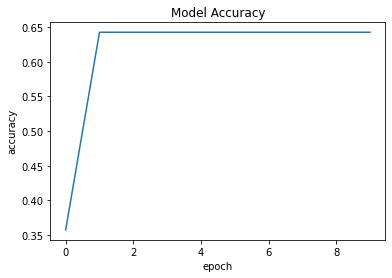

In [40]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

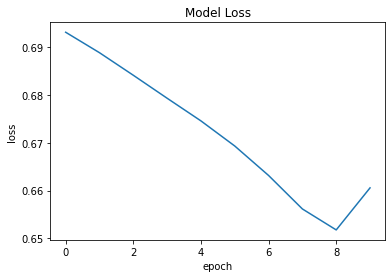

In [47]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [66]:
text = ['more time for sleep and exercise, improved relations with family members, and better mental health than before']
#sent = [w.lower() for w in text.split() if not w in STOPWORDS]
trail_token = Tokenizer()
trail_token.fit_on_texts(text)
#word_index = trail_token.word_index
trail_seq = trail_token.texts_to_sequences(text)
#dict(list(word_index.items())[0:10])
trail_pad = pad_sequences(trail_seq,maxlen=100,padding='post')

In [67]:
trail_pad

array([[ 2,  3,  4,  5,  1,  6,  7,  8,  9, 10, 11,  1, 12, 13, 14, 15,
        16,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0]], dtype=int32)

In [107]:
res = model.predict(trail_pad)
label = ['positive','negative']
print(res,label[np.argmax(trail_pad)>50])

[[0.30586618]] positive


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  This is separate from the ipykernel package so we can avoid doing imports until


**model 2**

In [72]:
model1 = Sequential()
# Embedding layer
model1.add(Embedding(5000,64,input_length=100))
model1.add(SimpleRNN(32,activation='tanh'))

model1.add(Embedding(5000,32,input_length=100))
model1.add(SimpleRNN(32,activation='tanh' ))

model1.add(Dense('1',activation='sigmoid'))


In [73]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 64)           320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
embedding_3 (Embedding)      (None, 32, 32)            160000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 485,217
Trainable params: 485,217
Non-trainable params: 0
_________________________________________________________________


In [79]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [85]:
history1=model1.fit(train_padded,y_train,epochs=10,verbose=2,batch_size=15)

Epoch 1/10
1/1 - 0s - loss: 0.6518 - accuracy: 0.6429
Epoch 2/10
1/1 - 0s - loss: 0.6518 - accuracy: 0.6429
Epoch 3/10
1/1 - 0s - loss: 0.6518 - accuracy: 0.6429
Epoch 4/10
1/1 - 0s - loss: 0.6518 - accuracy: 0.6429
Epoch 5/10
1/1 - 0s - loss: 0.6518 - accuracy: 0.6429
Epoch 6/10
1/1 - 0s - loss: 0.6518 - accuracy: 0.6429
Epoch 7/10
1/1 - 0s - loss: 0.6518 - accuracy: 0.6429
Epoch 8/10
1/1 - 0s - loss: 0.6518 - accuracy: 0.6429
Epoch 9/10
1/1 - 0s - loss: 0.6518 - accuracy: 0.6429
Epoch 10/10
1/1 - 0s - loss: 0.6518 - accuracy: 0.6429


In [83]:
model1.evaluate(val_padded,y_val)

1/1 [==============================] - 0s 25ms/step - loss: 0.9220 - accuracy: 0.1667


[0.921955406665802, 0.1666666716337204]

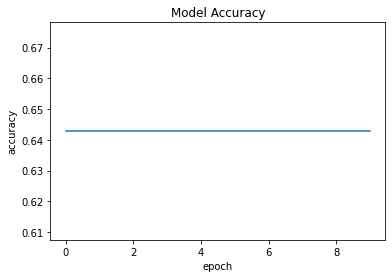

In [86]:
plt.plot(history1.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

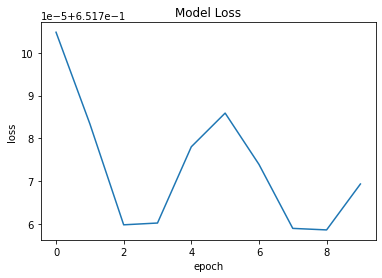

In [87]:
plt.plot(history1.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [105]:
res = model1.predict(trail_pad)
label = ['positive','negative']
print(res,label[np.argmax(trail_pad)>50])

[[0.36000234]] positive


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  This is separate from the ipykernel package so we can avoid doing imports until


**model 2**

In [92]:
model2 = Sequential()
# Embedding layer
model2.add(Embedding(4000,128,input_length=100))
model2.add(SimpleRNN(64,activation='tanh'))

model2.add(Embedding(4000,128,input_length=100))
model2.add(SimpleRNN(64,activation='relu' ))

model2.add(Embedding(4000,128,input_length=100))
model2.add(SimpleRNN(64,activation='tanh' ))

model2.add(Dense('1',activation='sigmoid'))

In [93]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 128)          512000    
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 64)                12352     
_________________________________________________________________
embedding_8 (Embedding)      (None, 64, 128)           512000    
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 64)                12352     
_________________________________________________________________
embedding_9 (Embedding)      (None, 64, 128)           512000    
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, 64)                12352     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [94]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [95]:
history2=model2.fit(train_padded,y_train,epochs=10,verbose=2,batch_size=15)


Epoch 1/10
1/1 - 1s - loss: 0.7034 - accuracy: 0.3571
Epoch 2/10
1/1 - 0s - loss: 0.6624 - accuracy: 0.6429
Epoch 3/10
1/1 - 0s - loss: 0.6525 - accuracy: 0.6429
Epoch 4/10
1/1 - 0s - loss: 0.6525 - accuracy: 0.6429
Epoch 5/10
1/1 - 0s - loss: 0.6546 - accuracy: 0.6429
Epoch 6/10
1/1 - 0s - loss: 0.6542 - accuracy: 0.6429
Epoch 7/10
1/1 - 0s - loss: 0.6524 - accuracy: 0.6429
Epoch 8/10
1/1 - 0s - loss: 0.6519 - accuracy: 0.6429
Epoch 9/10
1/1 - 0s - loss: 0.6534 - accuracy: 0.6429
Epoch 10/10
1/1 - 0s - loss: 0.6536 - accuracy: 0.6429


In [96]:
model2.evaluate(val_padded,y_val)

1/1 [==============================] - 0s 389ms/step - loss: 0.8959 - accuracy: 0.1667


[0.8958846926689148, 0.1666666716337204]

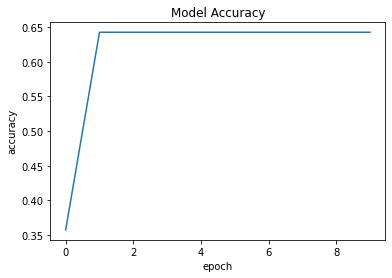

In [97]:
plt.plot(history2.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

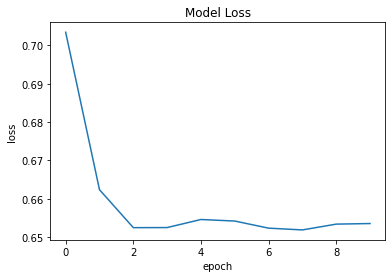

In [98]:
plt.plot(history2.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [104]:
res = model2.predict(trail_pad)
label = ['positive','negative']
print(res,label[np.argmax(trail_pad)>50])

[[0.37490138]] positive


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  This is separate from the ipykernel package so we can avoid doing imports until
